<a href="https://colab.research.google.com/github/prashant9316/Fashion-MNIST/blob/master/Fashion_MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Uploading the datasets for MNIST Fashion
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d zalando-research/fashionmnist

Saving kaggle.json to kaggle.json
 71% 49.0M/68.8M [00:00<00:00, 61.0MB/s]
100% 68.8M/68.8M [00:00<00:00, 117MB/s] 


In [4]:
! unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
import numpy as np
import pandas as pd

In [0]:
dataset = pd.read_csv('fashion-mnist_train.csv')
testset = pd.read_csv('fashion-mnist_test.csv')

In [8]:
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
X_features = dataset.iloc[:,1:785].values
y_labels = dataset.iloc[:,0].values

X_test_features = testset.iloc[:,0:784].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, 
                                                    y_labels,
                                                    test_size = 0.2,
                                                    random_state = 141)
np.random.seed(141)
#X_train = X_train.reshape(48000,784)
#X_test = X_test.reshape(12000,784)

#X_test_features = X_test_features.reshape(10000,784)

In [0]:
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.utils import np_utils
import keras

In [0]:

n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [23]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model = Model(Inp, output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0   

In [0]:
num_classes = 10
X_train = X_train.astype('float32'); X_test= X_test.astype('float32'); X_test_features = X_test_features.astype('float32')
X_train /= 255; X_test /= 255; X_test_features /= 255
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
learning_rate = 0.01
adam = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
batch_size = 100
training_epochs = 50

history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.1837 - acc: 0.9331 - val_loss: 0.3203 - val_acc: 0.8958
Epoch 2/50
48000/48000 [==============================] - 2s 50us/step - loss: 0.1814 - acc: 0.9345 - val_loss: 0.3158 - val_acc: 0.8982
Epoch 3/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.1809 - acc: 0.9347 - val_loss: 0.3133 - val_acc: 0.8937
Epoch 4/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.1801 - acc: 0.9340 - val_loss: 0.3169 - val_acc: 0.8954
Epoch 5/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.1814 - acc: 0.9345 - val_loss: 0.3084 - val_acc: 0.8974
Epoch 6/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.1822 - acc: 0.9335 - val_loss: 0.3336 - val_acc: 0.8929
Epoch 7/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.1789 - acc: 0.9346 - val_loss: 0.3229 - val_acc

In [0]:
# creating a Convolutional Neural Network 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
import cv2

In [0]:
model = Sequential()

# Adding first Conv Layer
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 3), activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Adding second conv layer
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flattening again
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Creating a softmax class output layer
model.add(Dense(10, activation = 'softmax'))


In [0]:
epochs = 25
learning_rate = 1e-2
batch_size = 32

In [0]:
X_train = X_train.reshape(48000, 28, 28, 1)
X_test = X_test.reshape(12000, 28, 28,1)


In [0]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / epochs)

model.compile(loss="categorical_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [65]:
history2 = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 18s 373us/step - loss: 0.6985 - acc: 0.7551 - val_loss: 0.4170 - val_acc: 0.8464
Epoch 2/25
48000/48000 [==============================] - 14s 283us/step - loss: 0.4153 - acc: 0.8520 - val_loss: 0.3441 - val_acc: 0.8756
Epoch 3/25
48000/48000 [==============================] - 13s 278us/step - loss: 0.3417 - acc: 0.8762 - val_loss: 0.2842 - val_acc: 0.8962
Epoch 4/25
48000/48000 [==============================] - 13s 279us/step - loss: 0.3119 - acc: 0.8863 - val_loss: 0.2639 - val_acc: 0.9047
Epoch 5/25
48000/48000 [==============================] - 13s 276us/step - loss: 0.2875 - acc: 0.8950 - val_loss: 0.2574 - val_acc: 0.9081
Epoch 6/25
48000/48000 [==============================] - 13s 274us/step - loss: 0.2742 - acc: 0.9003 - val_loss: 0.2449 - val_acc: 0.9135
Epoch 7/25
48000/48000 [==============================] - 13s 277us/step - loss: 0.2630 - acc: 0.9055 - val_loss: 0.

In [0]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis = 1),y_pred.argmax(axis = 1), target_names = labelNames))

              precision    recall  f1-score   support

         top       0.85      0.92      0.88      1173
     trouser       0.99      0.99      0.99      1154
    pullover       0.91      0.89      0.90      1214
       dress       0.91      0.93      0.92      1217
        coat       0.89      0.88      0.88      1181
      sandal       0.99      0.98      0.99      1259
       shirt       0.80      0.77      0.78      1227
     sneaker       0.95      0.98      0.97      1221
         bag       0.99      0.98      0.98      1170
  ankle boot       0.98      0.96      0.97      1184

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



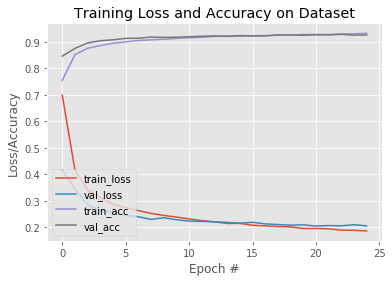

In [71]:
import matplotlib.pyplot as plt
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history2.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")